<a href="https://colab.research.google.com/github/mcv9201/IBY/blob/main/mini_xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount =True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Activation, Convolution2D, Conv2D, Dropout, AveragePooling2D, BatchNormalization, GlobalAveragePooling2D, Flatten, Input, MaxPooling2D, SeparableConv2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import layers


train = ImageDataGenerator(rescale = 1/255)
val = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory('/content/drive/MyDrive/Sample Data/train',target_size=(48,48),batch_size = 16,classes = ['angry','disgust','fear','happy','neutral','sad','surprise'])
val_dataset = val.flow_from_directory('/content/drive/MyDrive/Sample Data/test',target_size=(48,48),batch_size = 16,classes = ['angry','disgust','fear','happy','neutral','sad','surprise'],)

input_shape = (48,48,3)
l2_regularization=0.01
regularization = l2(l2_regularization)

# base,
img_input = Input(input_shape)
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
            use_bias=False)(img_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
            use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# module 1
residual = Conv2D(16, (1, 1), strides=(2, 2),
                  padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(16, (3, 3), padding='same',
                    kernel_regularizer=regularization,
                    use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(16, (3, 3), padding='same',
                    kernel_regularizer=regularization,
                    use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# module 2
residual = Conv2D(32, (1, 1), strides=(2, 2),
                  padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(32, (3, 3), padding='same',
                    kernel_regularizer=regularization,
                    use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(32, (3, 3), padding='same',
                    kernel_regularizer=regularization,
                    use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# module 3
residual = Conv2D(64, (1, 1), strides=(2, 2),
                  padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(64, (3, 3), padding='same',
                    kernel_regularizer=regularization,
                    use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(64, (3, 3), padding='same',
                    kernel_regularizer=regularization,
                    use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# module 4
residual = Conv2D(128, (1, 1), strides=(2, 2),
                  padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(128, (3, 3), padding='same',
                    kernel_regularizer=regularization,
                    use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same',
                    kernel_regularizer=regularization,
                    use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

x = Conv2D(7, (3, 3),
            # kernel_regularizer=regularization,
            padding='same')(x)
x = GlobalAveragePooling2D()(x)
output = Activation('softmax', name='predictions')(x)

model = Model(img_input, output)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

hist = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 50,
    verbose=1,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(val_dataset),
)

fer_json = model.to_json()
with open("/content/drive/MyDrive/mini_xception.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("/content/drive/MyDrive/mini_xception.h5")

Found 28711 images belonging to 7 classes.
Found 7187 images belonging to 7 classes.
Epoch 1/50
1795/1795 [==============================] - 8884s 5s/step - loss: 1.8343 - accuracy: 0.3220 - val_loss: 2.5311 - val_accuracy: 0.2283
Epoch 2/50
1795/1795 [==============================] - 225s 125ms/step - loss: 1.4188 - accuracy: 0.4740 - val_loss: 1.8308 - val_accuracy: 0.3122
Epoch 3/50
1795/1795 [==============================] - 218s 122ms/step - loss: 1.2901 - accuracy: 0.5182 - val_loss: 1.3370 - val_accuracy: 0.5140
Epoch 4/50
1795/1795 [==============================] - 217s 121ms/step - loss: 1.2042 - accuracy: 0.5525 - val_loss: 1.4804 - val_accuracy: 0.4798
Epoch 5/50
1795/1795 [==============================] - 219s 122ms/step - loss: 1.1407 - accuracy: 0.5831 - val_loss: 1.2921 - val_accuracy: 0.5177
Epoch 6/50
1795/1795 [==============================] - 217s 121ms/step - loss: 1.1003 - accuracy: 0.5925 - val_loss: 1.2916 - val_accuracy: 0.5287
Epoch 7/50
1795/1795 [=======

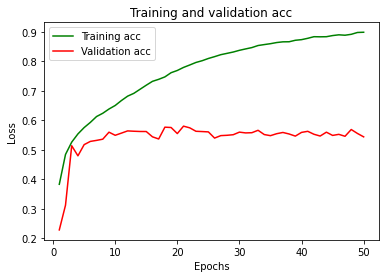

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs,acc,'g',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()